# Proyecciones de ventas con Run Rate

## En esta ocasión se realiza importando un archivo .csv

Run rate anual proyectado: $97,929


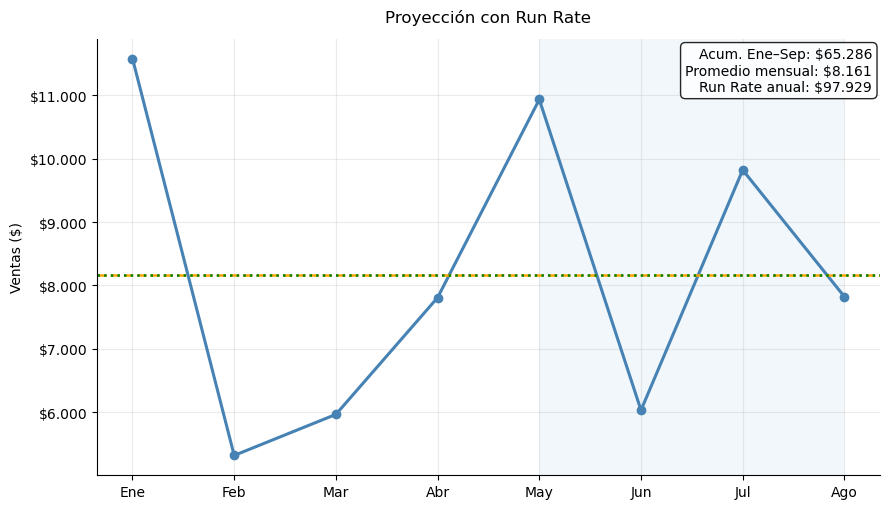

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

df = pd.read_csv("ventas.csv")

meses = df["Mes"].tolist()
ventas = df["Ventas"].tolist()

# Cálculos

ventas_acumuladas = sum(ventas)
meses_transcurridos = len(ventas)
promedio_mensual = ventas_acumuladas / meses_transcurridos
run_rate_anual = promedio_mensual * 12
print(f"Run rate anual proyectado: ${run_rate_anual:,.0f}")

# Gráfico

plt.figure(figsize=(9, 5.2))
plt.plot(meses, ventas, linewidth=2.2, marker="o", markersize=6, color="steelblue")

plt.axhline(promedio_mensual, linestyle="--", linewidth=1.8, color="orange")
plt.axhline(run_rate_anual/12, linestyle=":", linewidth=1.8, color="green")

plt.axvspan(meses[-4], meses[-1], alpha=0.06)

plt.title("Proyección con Run Rate", pad=12)
plt.ylabel("Ventas ($)")

# Formato de miles
def miles_formatter(x, pos):
    return f"${x:,.0f}".replace(",", ".")
plt.gca().yaxis.set_major_formatter(FuncFormatter(miles_formatter))

plt.grid(True, alpha=0.25)
for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

# Nota final (única info textual en el gráfico)
nota = (
    f"Acum. Ene–Sep: ${ventas_acumuladas:,.0f}\n"
    f"Promedio mensual: ${promedio_mensual:,.0f}\n"
    f"Run Rate anual: ${run_rate_anual:,.0f}"
).replace(",", ".")
plt.text(
    0.99, 0.98, nota,
    transform=plt.gca().transAxes,
    ha="right", va="top",
    bbox=dict(facecolor="white", alpha=0.85, boxstyle="round,pad=0.35")
)

plt.tight_layout()
plt.show()
